<a href="https://colab.research.google.com/github/max200018/ML/blob/main/%D0%9A%D0%9F_%D0%90%D1%80%D1%85%D0%B8%D0%BF%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd
import math
import seaborn as sns
from scipy.optimize import fmin_tnc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# 1. Выбрать задачу (классификация или регрессия), датасет (пересечений не должно быть - у каждого студента свой датасет) и метрику качества

#Классификация, https://www.kaggle.com/tsarkov90/crime-in-russia-20032020


В этом датасете собрана статистика преступлений на территории РФ за последние годы. Датасет представляет количество совершенных преступлений по различным категориям: угон, мошенничество, с применением оружия и т.д. Ниже представлено как менялось общее число преступлений за последнее время. 
Выделим два параметра: преступления, связанные **с угонами автомобилей** и **наркотиками**. Данные можно разделить по временному параметру, преступления, совершенные до 2010 года (класс 0) и после 2012 года (класс 1).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crime.csv to crime (1).csv


In [ ]:
data = pd.read_csv('./crime.csv')
data.head()

,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
0,01.01.2003,214587.0,88203.0,20162.0,1216.0,630.0,13.0,2749.0,5559.0,574.0,81014.0,3549.0,7731.0,10560.0,16006.0,4661.0
1,01.02.2003,221928.0,88863.0,20889.0,1701.0,678.0,5.0,2444.0,4732.0,515.0,95970.0,3697.0,7607.0,10816.0,16839.0,5364.0
2,01.03.2003,248452.0,101349.0,24053.0,1817.0,809.0,10.0,2864.0,4851.0,560.0,79420.0,4327.0,9437.0,11813.0,20176.0,5938.0
3,01.04.2003,236299.0,91625.0,19754.0,2449.0,892.0,10.0,2919.0,4722.0,668.0,95215.0,5345.0,7824.0,12636.0,16614.0,5230.0
4,01.05.2003,230931.0,89615.0,17519.0,3530.0,796.0,20.0,2713.0,4895.0,688.0,94505.0,6374.0,7122.0,12234.0,14413.0,5112.0


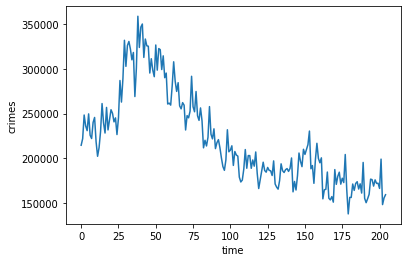

In [ ]:
    crims = data['Total_crimes']
    plt.plot(crims)
    plt.xlabel('time')
    plt.ylabel('crimes')
    plt.show()

In [ ]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов

In [ ]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           205 non-null    object 
 1   Total_crimes    205 non-null    float64
 2   Serious         205 non-null    float64
 3   Huge_damage     205 non-null    float64
 4   Ecological      205 non-null    float64
 5   Terrorism       205 non-null    float64
 6   Extremism       205 non-null    float64
 7   Murder          205 non-null    float64
 8   Harm_to_health  205 non-null    float64
 9   Rape            205 non-null    float64
 10  Theft           205 non-null    float64
 11  Vehicle_theft   205 non-null    float64
 12  Fraud_scam      205 non-null    float64
 13  Hooligan        205 non-null    float64
 14  Drugs           205 non-null    float64
 15  Weapons         205 non-null    float64
dtypes: float64(15), object(1)
memory usage: 25.8+ KB


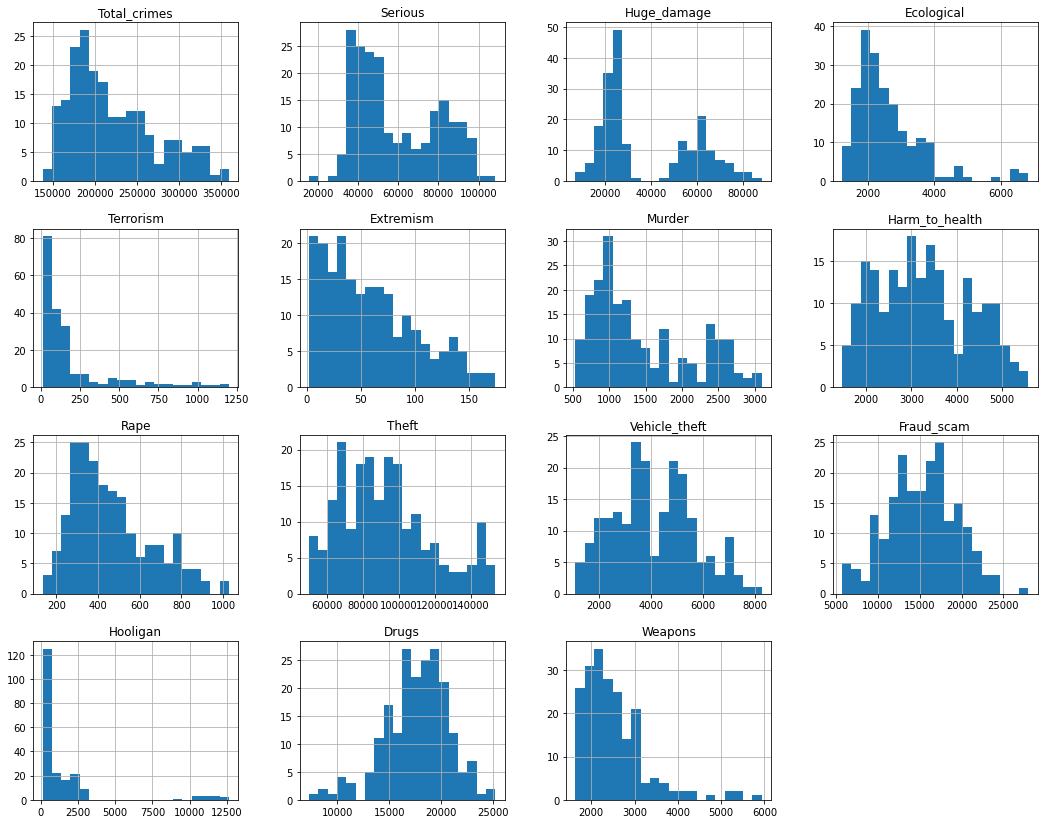

In [ ]:
data[data.columns].hist(figsize =  (18,14.3), bins = 20);

In [ ]:
data = data.fillna(0)

In [ ]:
num = list(data.dtypes[data.dtypes == "float64"].index)

In [ ]:
data[num].describe()

,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,221279.019512,59068.487805,38402.039024,2592.463415,197.839024,59.473171,1451.400000,3276.024390,463.580488,92647.560976,4101.414634,15277.834146,1457.648780,17644.356098,2525.019512
std,51720.759692,20501.515982,20755.286960,1028.101551,245.462645,42.070500,687.713793,1013.861819,188.413369,25376.346430,1565.682727,4114.474680,2560.889194,3068.123707,733.169890
min,137657.000000,15755.000000,7424.000000,1216.000000,12.000000,2.000000,534.000000,1467.000000,134.000000,50155.000000,1092.000000,5687.000000,132.000000,7275.000000,1637.000000
25%,180711.000000,42135.000000,21813.000000,1888.000000,57.000000,26.000000,932.000000,2479.000000,322.000000,72533.000000,2928.000000,12481.000000,261.000000,16006.000000,2029.000000
50%,207550.000000,51426.000000,26357.000000,2322.000000,103.000000,52.000000,1200.000000,3256.000000,419.000000,88095.000000,3923.000000,15303.000000,486.000000,17924.000000,2351.000000
75%,254352.000000,78407.000000,59282.000000,3034.000000,184.000000,87.000000,1975.000000,4152.000000,574.000000,107555.000000,5125.000000,18005.000000,1785.000000,19686.000000,2868.000000
max,359098.000000,108299.000000,87941.000000,6822.000000,1198.000000,174.000000,3099.000000,5578.000000,1027.000000,153394.000000,8251.000000,27980.000000,12636.000000,25187.000000,5938.000000


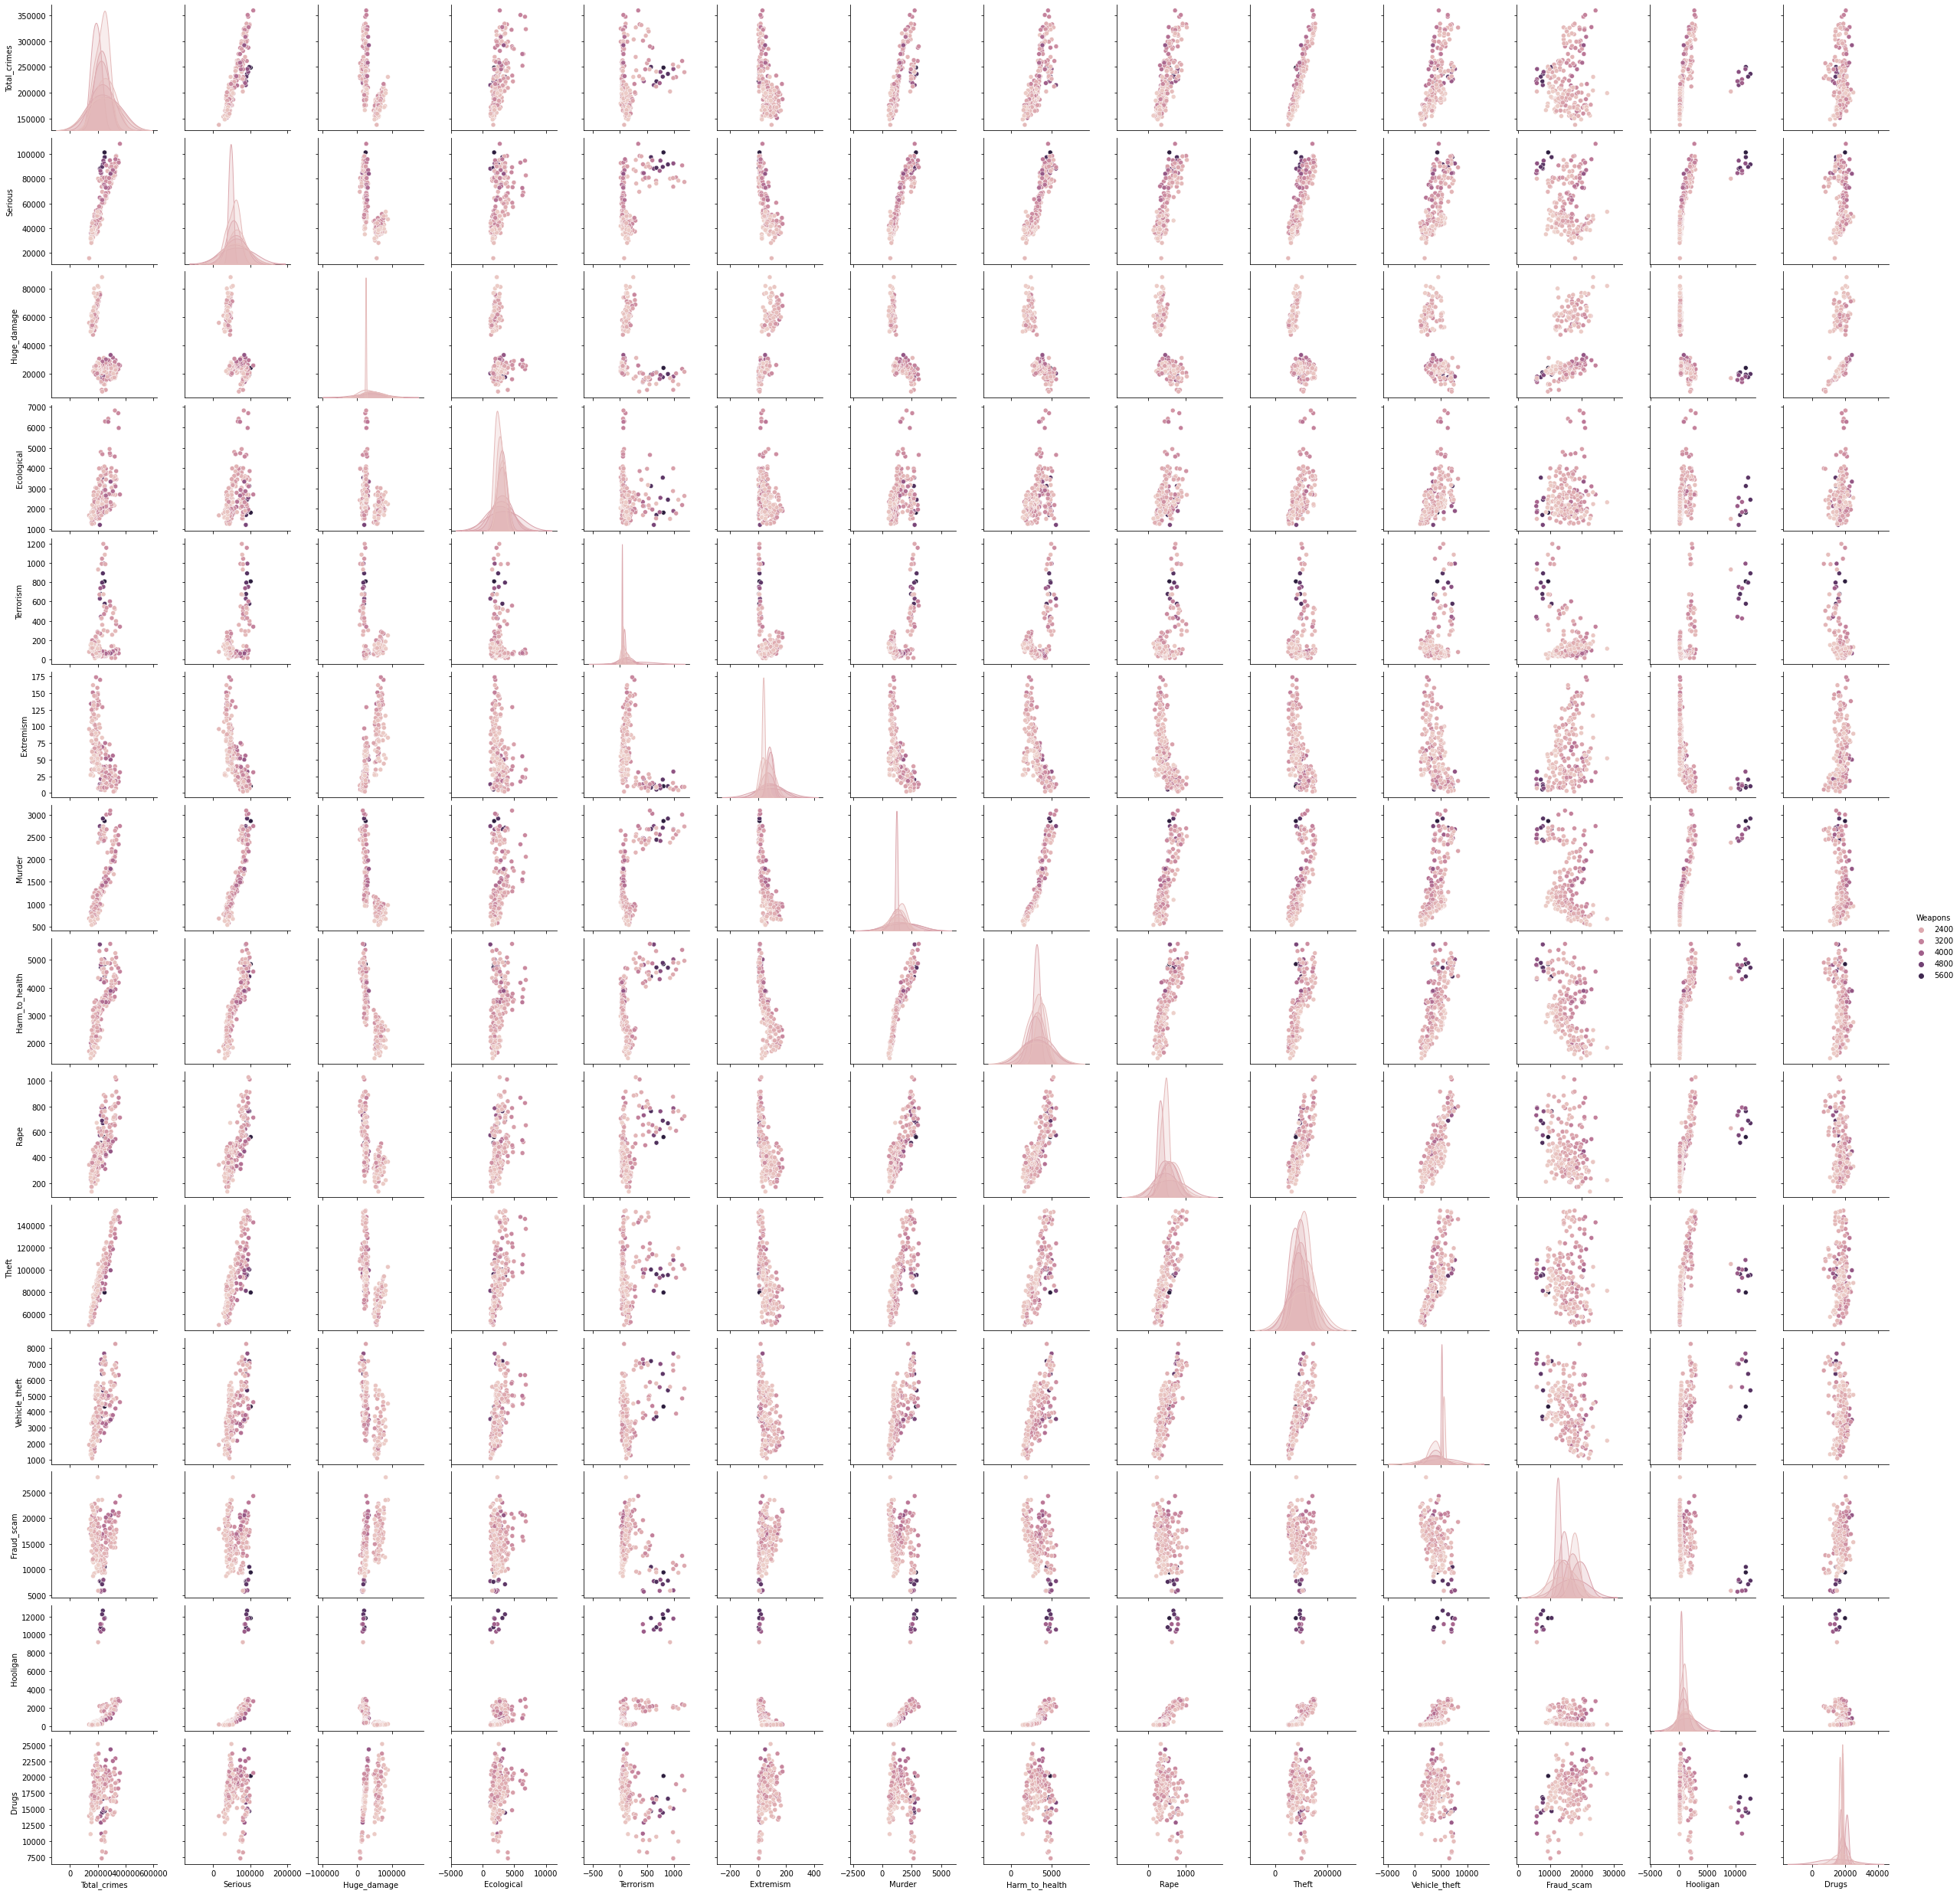

In [ ]:
sns.pairplot(data[num], hue = 'Weapons');

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
Total_crimes,1.00,0.89,-0.59,0.62,0.18,-0.58,0.76,0.76,0.79,0.95,0.63,0.10,0.31,0.09,0.26
Serious,0.89,1.00,-0.71,0.43,0.48,-0.72,0.93,0.91,0.83,0.81,0.63,-0.14,0.62,-0.06,0.51
Huge_damage,-0.59,-0.71,1.00,-0.36,-0.28,0.75,-0.74,-0.81,-0.63,-0.60,-0.56,0.48,-0.42,0.27,-0.29
Ecological,0.62,0.43,-0.36,1.00,-0.13,-0.29,0.33,0.38,0.46,0.58,0.50,0.10,0.05,0.17,0.11
Terrorism,0.18,0.48,-0.28,-0.13,1.00,-0.37,0.66,0.53,0.49,0.18,0.34,-0.38,0.63,-0.44,0.39
Extremism,-0.58,-0.72,0.75,-0.29,-0.37,1.00,-0.71,-0.73,-0.61,-0.60,-0.50,0.33,-0.46,0.30,-0.17
Murder,0.76,0.93,-0.74,0.33,0.66,-0.71,1.00,0.95,0.84,0.73,0.66,-0.34,0.67,-0.28,0.47
Harm_to_health,0.76,0.91,-0.81,0.38,0.53,-0.73,0.95,1.00,0.82,0.74,0.72,-0.42,0.60,-0.17,0.41
Rape,0.79,0.83,-0.63,0.46,0.49,-0.61,0.84,0.82,1.00,0.82,0.80,-0.26,0.53,-0.26,0.23
Theft,0.95,0.81,-0.60,0.58,0.18,-0.60,0.73,0.74,0.82,1.00,0.74,-0.06,0.30,-0.03,0.06


In [ ]:
def dataPreparing(dataset, split):
    X1 = dataset[0:71]['Vehicle_theft'].values
    Y1 = dataset[0:71]['Drugs'].values
    X2 = dataset[132:205]['Vehicle_theft'].values
    Y2 = dataset[132:205]['Drugs'].values

    req_data = []
    for i in range(len(X1)):
        req_data.append([[X1[i], Y1[i]],0])

    for i in range(len(X2)):
        req_data.append([[X2[i], Y2[i]],1])

    trainData =[]
    testData = []
    for i in range (len(req_data)):
        if rd.random() < split:
            trainData.append(req_data[i])
        else:
            testData.append(req_data[i])

    testX = []
    testY = []
    trainX = []
    trainY = []
    #graphs
    
    plt.scatter(X1, Y1)
    plt.scatter(X2,Y2)
    plt.xlabel('Vehicle_theft')
    plt.ylabel('Drugs')
    plt.show()
    for i in range(len(trainData)):
        trainX.append(trainData[i][0])
        trainY.append(trainData[i][1])

    for i in range(len(testData)):
        testX.append(testData[i][0])
        testY.append(testData[i][1])

    trainX = np.array(trainX)
    trainY = np.array(trainY)
    testX = np.array(testX)

    return trainX, trainY, testX, testY

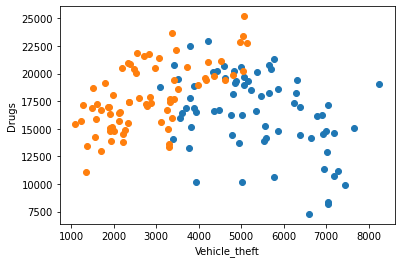

In [ ]:
trainX, trainY, testX, testY = dataPreparing(data, 0.85)

In [ ]:
# 3. Реализовать метрику качества \\ аргументировать выбор метрики качества 

In [ ]:
def accur(res, trueX):
	count = 0
	for i in range(len(trueX)):
		if ((res[i] >=0.5 and trueX[i] == 1) or
			(res[i] < 0.5 and trueX[i] == 0)):
			count+=1
	return count / len(trueX)

In [ ]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))


def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y), messages=0)
    return opt_weights[0]

def prediction(x, param):
    theta = param[:, np.newaxis]
    return probability(theta, x)

def predict(res, probab_threshold=0.5):
    predicted_classes = []
    for pred in res:
        if pred >= probab_threshold:
            predicted_classes += [1]
        else:
            predicted_classes += [0]
    return predicted_classes

def accur(res, trueX):
	count = 0
	for i in range(len(trueX)):
		if ((res[i] >=0.5 and trueX[i] == 1) or
			(res[i] < 0.5 and trueX[i] == 0)):
			count+=1
	return count / len(trueX)

In [ ]:
    trainLog = np.c_[np.ones(len(trainX)), trainX]
    testLog = np.c_[np.ones(len(testX)), testX]
    theta = np.zeros((trainLog.shape[1], 1))
    param = fit(trainLog, trainY, theta)
    res = prediction(testLog, param)
    pred_class = predict(res)
    test_report = classification_report(pred_class, testY)


In [ ]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках

In [ ]:
    print('my log:\n', pred_class)
    print('my accur: ', accur(res, testY))
    print(test_report)
    res = prediction(trainLog, param)
    pred_class = predict(res)
    print('LR train:', accur(pred_class, trainY))

my log:
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
my accur:  0.9473684210526315
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.91      0.95        11

    accuracy                           0.95        19
   macro avg       0.94      0.95      0.95        19
weighted avg       0.95      0.95      0.95        19

LR train: 0.848


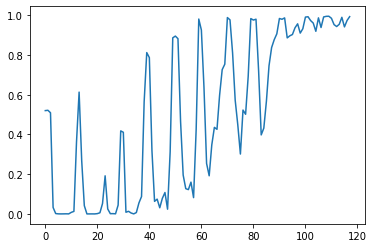

In [ ]:
plt.plot(res)

In [ ]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на обучающей и тестовой выборках и сравнить со своей моделью

In [ ]:
    model = LogisticRegression(solver='liblinear', random_state=0).fit(trainX, trainY)
    pred = model.predict(testX)
    test_report = classification_report(pred, testY)
    print('sklearn log: \n', pred)
    print('accur: ',model.score(testX,testY))
    print(test_report)
    res = prediction(trainLog, param)
    pred_class = predict(res)
    print('LR train:', accur(pred_class, trainY))

sklearn log: 
 [0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1]
accur:  0.9473684210526315
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.91      0.95        11

    accuracy                           0.95        19
   macro avg       0.94      0.95      0.95        19
weighted avg       0.95      0.95      0.95        19

LR train: 0.848


Собственная реализация и sklearn совпадают

*Выполнил Архипов Максим, М80-407Б-18*